# Model Tuning for Regressor
![](banner_model_tuning.jpg)
_<p style="text-align: center;"> Which model performs best? </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)


.................................................... start of document ....................................................

## Introduction

Motivation, context, history, related topics ...

## Terms

## Data

Consider this pedagogical dataset.

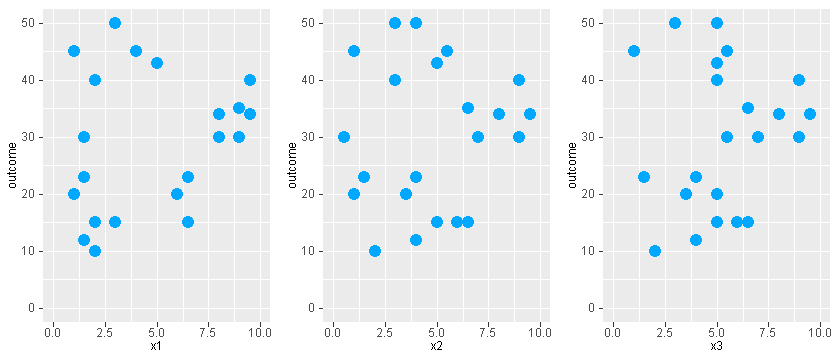

In [2]:
data = data.frame(x1=c(1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 6.5, 8.0, 9.0, 9.5, 1.0, 1.5, 2.0, 3.0, 1.5, 2.0, 3.0, 6.5, 8.0, 9.0, 9.5),
                  x2=c(1.0, 0.5, 3.0, 4.0, 5.5, 5.0, 3.5, 4.0, 7.0, 6.5, 9.0, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 6.5, 8.0, 9.0, 9.5),
                  x3=c(5.0, 5.5, 5.0, 5.0, 5.5, 5.0, 3.5, 4.0, 7.0, 6.5, 9.0, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 6.5, 8.0, 9.0, 9.5),
                  outcome=c(20,30,40,50,45,43,20,23,30,35,40,45,23,10,50,12,15,15,15,34,30,34))

p1 = ggplot(data) + xlim(0,10) + ylim(0,50) + geom_point(aes(x=x1, y=outcome))
p2 = ggplot(data) + xlim(0,10) + ylim(0,50) + geom_point(aes(x=x2, y=outcome))
p3 = ggplot(data) + xlim(0,10) + ylim(0,50) + geom_point(aes(x=x3, y=outcome))

grid.arrange(p1, p2, p3, nrow=1)

## Automatic Iteration

In [3]:
xc = c()
for (i in 1:5) { xc[i] = i*10 }
xc

[1] 10 20 30 40 50

In [4]:
xl = list()
for (i in 1:3) { xl[[i]] = data.frame(A=c(i,i+1), B=c(i*10,i*10+1)) }
xl # a list

A,B
1,10
2,11
A,B
2,20
3,21
A,B
3,30
4,31


## Cross Validation Revisited

### Choose Number of Folds 

In [5]:
nfold = 5
fmt(nfold)

nfold
5


#### Training Data & Testing Data for Each Fold 

In [6]:
set.seed(0)
fold = createFolds(data$outcome, k=nfold)

data.train = list()
data.test  = list()
for (i in 1:nfold) { data.train[[i]] = data[setdiff(1:nrow(data), fold[[i]]),]
                     data.test[[i]]  = data[fold[[i]],] }

layout(fmt(data.train[[1]]), fmt(data.train[[2]]), fmt(data.train[[3]]), fmt(data.train[[4]]), fmt(data.train[[5]]))
layout(fmt(data.test[[1]]),  fmt(data.test[[2]]),  fmt(data.test[[3]]),  fmt(data.test[[4]]),  fmt(data.test[[5]]))

x1,x2,x3,outcome
1.0,1.0,5.0,20
1.5,0.5,5.5,30
2.0,3.0,5.0,40
4.0,5.5,5.5,45
5.0,5.0,5.0,43
6.0,3.5,3.5,20
9.0,6.5,6.5,35
9.5,9.0,9.0,40
1.0,1.0,1.0,45
1.5,1.5,1.5,23


x1,x2,x3,outcome
3.0,4.0,5.0,50
6.5,4.0,4.0,23
8.0,7.0,7.0,30
2.0,2.0,2.0,10
9.5,9.5,9.5,34
x1,x2,x3,outcome
5.0,5.0,5.0,43
9.0,6.5,6.5,35
9.5,9.0,9.0,40
1.5,4.0,4.0,12


### An Error Table for Each Fold 

In [7]:
error = list()
for (i in 1:nfold) { set.seed(0)
                     model = rpart(outcome ~ x1+x2+x3, data.train[[i]])
                     model = svm(outcome ~ x1+x2+x3, data.train[[i]], scale=TRUE, type="eps-regression", kernel="radial", gamma=1, cost=1)
                     outcome.predicted = predict(model, data.test[[i]])
                     error[[i]] = data.test[[i]]$outcome - outcome.predicted }

layout(fmt(error[[1]]), fmt(error[[2]]), fmt(error[[3]]), fmt(error[[4]]), fmt(error[[5]]))

error[[1]]
22.192709
-2.684651
-1.732365
-18.254602
3.613985
error[[2]]
10.747803
6.407713
7.009512
-25.704215


### A Performance Measurement for Each Fold 

In [8]:
rmse = c()
for (i in 1:nfold) { rmse[i] = sqrt(mean(error[[i]]^2)) }

layout(fmt(rmse[1]), fmt(rmse[2]), fmt(rmse[3]), fmt(rmse[4]), fmt(rmse[5]))

rmse[1]
13.03086
rmse[2]
16.84712
rmse[3]
15.78516
rmse[4]
18.02029
rmse[5]
14.67609


### A Performance Measurement for the Model

In [9]:
rmse.cv = mean(rmse)
fmt(rmse.cv)

rmse.cv
15.6719


### Put It All Together

In [10]:
nfold = 5

set.seed(0)
fold = createFolds(data$outcome, k=nfold)

rmse = c()
for (i in 1:nfold) { data.train = data[setdiff(1:nrow(data), fold[[i]]),]
                     data.test  = data[fold[[i]],]
                     set.seed(0)
                     model = svm(outcome ~ x1+x2+x3, data.train, scale=TRUE, type="eps-regression", kernel="radial", gamma=1, cost=1)
                     outcome.predicted = predict(model, data.test)
                     error = data.test$outcome - outcome.predicted
                     rmse[i] = sqrt(mean(error^2)) }

rmse.cv = mean(rmse)
fmt(rmse.cv)

rmse.cv
15.6719


## Model Tuning by Hyper-Parameter Value Selection

In [11]:
tune = data.frame()
for (j in 1:4)  # try several values for degree
for (k in c(0.1, 1, 10, 100, 1000))  # try several values for cost   
{
    tune = rbind(tune, data.frame(degree=j, cost=k))   
}
    
tune

degree,cost
1,0.1
1,1.0
1,10.0
1,100.0
1,1000.0
2,0.1
2,1.0
2,10.0
2,100.0
2,1000.0


In [12]:
tune = data.frame()
for (j in 1:4)  # try several values for gamma hyper-parameter
for (k in c(0.1, 1, 10, 100, 1000))  # try several values for cost hyper-parameter
{ 

    nfold = 5

    set.seed(0)
    fold = createFolds(data$outcome, k=nfold)

    rmse = c()
    for (i in 1:nfold) { data.train = data[setdiff(1:nrow(data), fold[[i]]),]
                         data.test  = data[fold[[i]],]

                         set.seed(0)
                         model = svm(outcome ~ x1+x2+x3, data.train, scale=TRUE, type="eps-regression", kernel="radial", gamma=j, cost=k)
                         outcome.predicted = predict(model, data.test)
                         error = data.test$outcome - outcome.predicted
                         rmse[i] = sqrt(mean(error^2)) }

    rmse.cv = mean(rmse)
    tune = rbind(tune, data.frame(method="svm", gamma=j, cost=k, nfold, rmse.cv))  
    
}
    
fmt(tune)

method,gamma,cost,nfold,rmse.cv
svm,1,0.1,5,12.75124
svm,1,1.0,5,15.67190
svm,1,10.0,5,15.55262
svm,1,100.0,5,15.53645
svm,1,1000.0,5,15.53645
svm,2,0.1,5,12.55900
svm,2,1.0,5,14.40599
svm,2,10.0,5,13.23845
svm,2,100.0,5,13.23845
svm,2,1000.0,5,13.23845


In [13]:
best = tune[which.min(tune$rmse.cv),]
fmt(best)

method,gamma,cost,nfold,rmse.cv
svm,4,0.1,5,12.35901


## Model Tuning by Exhaustive Variable Selection

Also called "feature selection" and "attribute selection". 

In [14]:
exhaustive(names(data), keep="outcome") # a list

[[1]]
[1] "x1"      "outcome"

[[2]]
[1] "x2"      "outcome"

[[3]]
[1] "x3"      "outcome"

[[4]]
[1] "x1"      "x2"      "outcome"

[[5]]
[1] "x1"      "x3"      "outcome"

[[6]]
[1] "x2"      "x3"      "outcome"

[[7]]
[1] "x1"      "x2"      "x3"      "outcome"

In [15]:
tune = data.frame()
for (f in exhaustive(names(data), keep="outcome"))
{
    tune = rbind(tune, data.frame(variables=vector2string(f)))
}

tune # a data.frame

variables
"x1, outcome"
"x2, outcome"
"x3, outcome"
"x1, x2, outcome"
"x1, x3, outcome"
"x2, x3, outcome"
"x1, x2, x3, outcome"


In [16]:
tune = data.frame()
for (f in exhaustive(names(data), keep="outcome")) # try every combination of variables
{ 

    nfold = 5

    set.seed(0)
    fold = createFolds(data$outcome, k=nfold)

    rmse = c()
    for (i in 1:nfold) { data.train = data[setdiff(1:nrow(data), fold[[i]]),]
                         data.test  = data[fold[[i]],]

                         set.seed(0)
                         model = svm(outcome ~ ., data.train[,f], scale=TRUE, type="eps-regression", kernel="radial", gamma=1, cost=1)
                         outcome.predicted = predict(model, data.test)
                         error = data.test$outcome - outcome.predicted
                         rmse[i] = sqrt(mean(error^2)) }

    rmse.cv = mean(rmse)
    tune = rbind(tune, data.frame(method="svm", variables=vector2string(f), nfold, rmse.cv))  
    
}
    
fmt(tune)

method,variables,nfold,rmse.cv
svm,"x1, outcome",5,13.68194
svm,"x2, outcome",5,14.24143
svm,"x3, outcome",5,13.44370
svm,"x1, x2, outcome",5,15.51140
svm,"x1, x3, outcome",5,14.38060
svm,"x2, x3, outcome",5,14.74619
svm,"x1, x2, x3, outcome",5,15.67190


In [17]:
best = tune[which.min(tune$rmse.cv),]
fmt(best)

method,variables,nfold,rmse.cv
svm,"x3, outcome",5,13.4437


## Generalized Model Tuning

In [18]:
clock.start()

tune = data.frame()
for (f in exhaustive(names(data), keep="outcome")) # try every combination of variables
for (j in 1:4)  # try several values for gamma
for (k in c(0.1, 1, 10, 100, 1000))  # try several values for cost
{ 

    nfold = 5

    set.seed(0)
    fold = createFolds(data$outcome, k=nfold)

    rmse = c()
    for (i in 1:nfold) { data.train = data[setdiff(1:nrow(data), fold[[i]]),]
                         data.test  = data[fold[[i]],]

                         set.seed(0)
                         model = svm(outcome ~ ., data.train[,f], scale=TRUE, type="eps-regression", kernel="radial", gamma=j, cost=k)
                         outcome.predicted = predict(model, data.test)
                         error = data.test$outcome - outcome.predicted
                         rmse[i] = sqrt(mean(error^2)) }

    rmse.cv = mean(rmse)
    tune = rbind(tune, data.frame(method="svm", gamma=j, cost=k, variables=vector2string(f), nfold, rmse.cv))  
    
}
  
clock.stop()
    
size(tune)
tune

Time difference of 5.862686 secs


observations,variables
140,6


method,gamma,cost,variables,nfold,rmse.cv
svm,1,0.1,"x1, outcome",5,12.63245
svm,1,1.0,"x1, outcome",5,13.68194
svm,1,10.0,"x1, outcome",5,12.54013
svm,1,100.0,"x1, outcome",5,14.74634
svm,1,1000.0,"x1, outcome",5,16.59559
svm,2,0.1,"x1, outcome",5,12.47440
svm,2,1.0,"x1, outcome",5,12.26093
svm,2,10.0,"x1, outcome",5,14.27878
svm,2,100.0,"x1, outcome",5,16.39965
svm,2,1000.0,"x1, outcome",5,16.39894


In [19]:
best = tune[which.min(tune$rmse.cv),]
fmt(best)

method,gamma,cost,variables,nfold,rmse.cv
svm,1,10,"x1, x2, outcome",5,10.95492


## Code

### Useful Functions

In [20]:
# exhaustive            # from setup.R
# string2vector         # from setup.R
# vector2string         # from setup.R

# help(createFolds)     # from caret library
# help(list)            # from base library
# help(paste)           # from base library
# help(rbind)           # from base library
# help(setdiff)         # from base library
# help(which.min)       # from base library

## Expectations

Know about this:
* How to evaluate model performance by cross validation, conceptually and using R.
* How to tune a model by hyper-parameter value selection, conceptually and using R.
* How to tune a model by variable selection, conceptually and using R.
* How to tune a model by hyper-parameter value and variable selection, conceptually and using R.
* Compute time effects of tuning, conceptually in general.

## Further Reading

* http://www-stat.wharton.upenn.edu/~stine/mich/DM_03.pdf
* http://www.milanor.net/blog/cross-validation-for-predictive-analytics-using-r/
* http://www.cs.cmu.edu/~./awm/tutorials/overfit10.pdf

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised April 16, 2021
</span>
</p>